## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project.

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1')['converted'].count() / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').count()[0]

1965

In [7]:
df.query('group != "treatment" and landing_page == "new_page"').count()[0]

1928

In [8]:
1965 + 1928

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.iloc[df.query('group == "treatment" and landing_page == "new_page"').index.values]

In [11]:
df3 = df.iloc[df.query('group == "control" and landing_page == "old_page"').index.values]

In [12]:
df2 = df2.append(df3)

In [13]:
df2.shape

(290585, 5)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2.user_id.value_counts().argmax()

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


773192

c. What is the row information for the repeat **user_id**? 

In [17]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop(1899, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_convert = df2.query('group == "control"').converted.mean()
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_convert = df2.query('group == "treatment"').converted.mean()
treatment_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [53]:
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000619442226688

In [54]:
# What is the probability that an individual received the old page?
1 - 0.5000619442226688

0.4999380557773312

In [150]:
obs_mean = treatment_convert - control_convert
obs_mean

-0.0015782389853555567

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In the previous question, we only look at the probability that an individual received the new page regardless of the groups. That is, while the half individuals reveive the new page, other nearly half individuals receive the old page as well.  On the other hand, there is a small fraction between two control groups. Both the probabilty of the control and treatment groups is `0.12`. So I think there is no precise evidence that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5% (i.e. `0.05`), what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$  H_{null} :  p_{new} - p_{old} \leq 0 $$
$$  H_{alternative} : p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page.<br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [25]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

a. What is the **convert rate** for $p_{new}$ under the null?  <br><br>

In [26]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [84]:
n_new = df2.query('landing_page == "new_page"').count()[0] 
n_new

145310

d. What is $n_{old}$?

In [85]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

this one was tricky. But here we are looking at a null where there is no difference in conversion based on the page, which means the conversions for each page are the same.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [151]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
actual_diff = p_new - p_old
actual_diff

-0.0006352769932832791

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [187]:
p_diffs = []

for _ in range(10000):
    
    new_page_converted_sample = np.random.binomial(1, p_new_sample, n_new) # e
    old_page_converted_sample = np.random.binomial(1, p_old_sample, n_old) # f
    
    p_diffs.append(new_page_converted_sample.mean() - old_page_converted_sample.mean()) # g
    

Alternatively, we can do the same approach using the following snippet in order to eliminate the use of `for`: 

In [185]:
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
new_converted_simulation - old_converted_simulation
# Essentially, we are applying the null proportion to the total size of each page using the binomial distribution. 
# Each element, for example, innp.random.binomial(n_new, p_new, 10000) results in an array with values like [17262, 17250, 17277...]. 
# This array is 10000 elements large When we divide it by n_new, Python broadcasts n_new for each element and we return a proportion for each element.
# This is essentially is simulating, 10000, the new page conversion rate.

array([-2.00494369e-03, -9.15332788e-05,  1.01647347e-03, ...,
       -2.31473729e-03, -1.80547439e-03, -3.80512527e-04])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

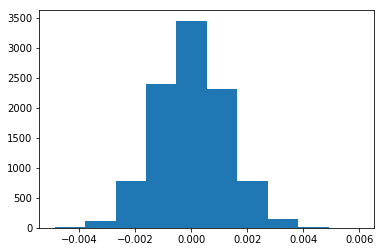

In [188]:
plt.hist(p_diffs);

In [46]:
# save p_diffs for later use
np.save('p_diffs', p_diffs)

The sample size of `df2` is large enough that our sampling distribution is bell shaped. As we observed the actual difference in $p_{new} - p_{old}$, based on the confidence interval, we have an equal difference in means between old and new pages. The normal distribution is small, that is, it's between (-0.05 and +0.05).

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [189]:
greater_than_difference = []
for i in range(len(p_diffs)):
    if p_diffs[i] > obs_mean:
        greater_than_difference.append(p_diffs[i])


In [190]:
len(greater_than_difference) / len(p_diffs)

0.9053

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

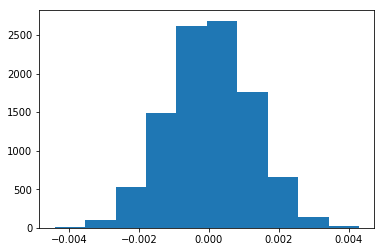

In [174]:
# What is this value called in scientific studies?
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), 10000)

# Plot the null distribution
plt.hist(null_vals);

In [175]:
# Compute p-value
# h_alternative : p_new > p_old
p_value = (null_vals > obs_mean).mean()
p_value

0.909

The actual difference is captured in the population. Since $ p_{value} > 0.05 $, we would fail to reject the null hypothesis. 90% of values from our null distribution fall to the right our actual difference. The old page has a higher probability of convertion rate than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
import statsmodels.api as sm

# the number of conversions for each page
convert_old = df2.query('landing_page == "old_page"').converted.sum()  # old page == control group
convert_new = df2.query('landing_page == "new_page"').converted.sum()  # new page == treatment group
# the number of individuals who received each page
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

In [88]:
convert_old , n_old

(17489, 145274)

In [89]:
convert_new, n_new

(17264, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [104]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

In [105]:
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [107]:
from scipy.stats import norm

norm.cdf(z_score) # Tells us how significant our z-score is

0.09494168724097551

In [108]:
norm.ppf(1-(0.05/2)) # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The calculated p-value using `proportions_ztest` is 0.9. As we know that 90% of values from our null distribution fall to the right or are above our actual mean in parts j and k. In this case, we would fail to reject the null hypothesis as `0.9 > 0.05`.

In other words, since the z-score of `-1.3109241984234394` does not exceed the critical value of `0.9050583127590245`, we would fail to reject the null hypothesis thatthe old page has a better or equal converted rate than the new page. 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we only need to yield two different output values that are categorical. We can perform a Logistic Regression model to compare two dummy variables rather than quantitative.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [65]:
df2['intercept'] = 1

In [68]:
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [69]:
import statsmodels.api as sm

In [164]:
ls = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
result = ls.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [165]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:22:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

In the **Part II**, we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5% (i.e. 0.05). We look at an one-tail test to test which page had a higher conversion rate with $h_{null}$ and $h_{alternative}$ hypotheses and the p-value was `0.9`. The p-value in Part II is dependent on our **alternative** hypothesis as we concern with the new page is better than the old page in the entire population. 

In this case, the result of the p-value of 'ab_page' is `0.19` in our logistic regression model. We only care about our explanatory variable which is `ab_page`. In regression mode, our null hypothesis now turns into that there is **no** difference between the two pages and the alternative hypothesis is that their difference is statistically different from one another. That is, logistic regression test is about a two-tail test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Since we already know that the number of old page equals to the number of control group and likewise the size of new pages is the same as the size of treatment group in the data, adding the landing_page column to our logistic regression model might not help in changing the result entirely. So we have one more column which is the timestamp column that could be another factor to influence whether or not an individual converts. The timestamp column  allows us to interpret when an user views the page durin a day. The columnd could change the conversion rate by converting the time as three categorical variables such as `morning`, `midday` and `evening`. 

> Are there any disadvantages to adding additional terms into your regression model?

Our model is now to understand how our x and y variables are related. Furthermore, we want to add more variables into our model. When adding three or more categorical variables that  are highly correlated, we need to consider one potential disadavantage that we learn in the lecture, which is `Multicollinearity`. This might affect our hypothesis testing result to be unhealth and unreliable. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [111]:
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [117]:
df2 = df2.merge(dfc, on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [119]:
df2[['CA', 'UK']] = pd.get_dummies(df2.country)[['CA', 'UK']]

We select `CA` and `UK` and drop the `US` column to make the matrice full rank.

In [124]:
df2['new_page'] = pd.get_dummies(df2.landing_page)['new_page']

In [163]:
# Create a logistic regression model with baselines as US and old_page
logit = sm.Logit(df2.converted, df2[['intercept', 'new_page', 'CA', 'UK']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        22:22:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

The predicted difference in the conversion of a page in CA as compared to the US holding other variables constant : -408.0

The predicted difference in the conversion of a page in UK as compared to the US holding other variables constant : -99.0

For every one unit increase new page, we predict the conversion of a page to decrease by 0.0149 holding all other variables constant.

The predicted converted page if the user views the old page in the US. = -19893

Let's calculate VIF value in order to determine whether we have multicollinearity in our model.

In [133]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~ new_page + CA + UK', df2, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [134]:
vif

,VIF Factor,features
0,2.428940,Intercept
1,1.000006,new_page
2,1.017759,CA
3,1.017761,UK


As a result, features' values are not larger than 10 that is, we don't have multicallinearity in our model!


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [140]:
df2['CA_new'] = df2['new_page'] * df2['CA']
df2['UK_new'] = df2['new_page'] * df2['UK']

In [162]:
# Create a second logistic regression model with baselines as US and old_page
logit = sm.Logit(df2.converted, df2[['intercept', 'new_page', 'CA_new', 'UK_new', 'CA', 'UK']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        22:21:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page      -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_new        -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_new         0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

Based on the results, only the intercept is statically significant. The coefficient of intereaction variables namely `CA_new` and `UK_new` are slightly different from the coefficient of new_page itself. I think adding a higher order term between page and country is useful in predicting the conversion of page. 

For every one unit increase in the conversion for new page from UK, the predicted increase in convertion is by 0.0314.

For every one unit increase in the conversion for new page from CA, the predicted decrease in convertion is by -0.0469.

The predicted difference between the conversion of pages viewed from CA and from US holding all other variables constant is -0.0175.

The predicted difference between the conversion of pages viewed from UK and from US holding all other variables constant is -0.0057.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!


In [184]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

## TIPS

- Spot On!!! Great intuition with the relationship between the different hypotheses statements.
- Extra Credit Knowing that Part iii is a two-tailed test and Part ii is a one-tail test, can you convert the p-values between each other?
One-Tailed and Two-Tailed Results
https://stats.idre.ucla.edu/other/mult-pkg/faq/pvalue-htm/

Part III 1e #2 : Second Part Not Answered. Please answer the second half of the question as it is just as important to understand. Why does it differ from the value you found in Part II? Think about how our hypotheses differs between Part II and Part III. What implications do the hypotheses have on how the p-value is calculated?

**HINT** In fact, you can interchange the p-values using the following formula. 1-0.19/2 = 0.9 (0.9 should be what you got in part ii). The reason lies in the fact that in part ii, we were concerned with which page had a higher conversion rate, so a one-tailed test. However, in part iii, the nature of a regression test is not concerned with which had a positive or negative change, specifically. It is concerned with if the condition had any effect at all, so a two-tailed test. You can actually see this in the formula to interchange the p-values because is essentially taking the two-tailed p-value, cutting it in half for only one of the tails, and then calculating the right side of the tail since we are concerned with which one is bigger.